In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import re
import json


In [2]:
# tournois="TCL#10"
# tournois="Coupe Astrale #10 04-10-2024"
# tournois="Grandapan sneaky tournament #1 19-10-2024"
# tournois="TCL#11 08-11-2024"
# tournois="Oshimo autumn cup #2 19-11-2024"
# tournois = "Tili One Cup - Tili 1"
# tournois= "Coupe Astrale #11 06-12-2024"
tournois= "Tili Two Cup - Tili 2"

In [3]:
Langue='FR'
# Langue='ES'
# Langue='EN'

# Variables

In [4]:
CLASSES=['xelor', 'enutrof', 'eniripsa', 'osamodas', 'zobal', 'sadida',
       'steamer', 'sacrieur', 'iop', 'pandawa', 'ecaflip', 'cra', 'feca',
       'sram', 'roublard']

TRADUCTIONS={
    'xelor' : {'FR' : "xelor","EN" : "xelor", "ES" : "xelor"}
    ,'enutrof' : {'FR' : "enutrof","EN" : "enutrof", "ES" : "anutrof"}
    ,'eniripsa' : {'FR' : "eniripsa","EN" : "eniripsa", "ES" : "aniripsa"}
    ,'osamodas' : {'FR' : "osamodas","EN" : "osamodas", "ES" : "osamodas"}
    ,'zobal' : {'FR' : "zobal","EN" : "zobal", "ES" : "masqueraider"}
    ,'sadida' : {'FR' : "sadida","EN" : "sadida", "ES" : "sadida"}
    ,'steamer' : {'FR' : "steamer","EN" : "foggernaut", "ES" : "steamer"}
    ,'sacrieur' : {'FR' : "sacrieur","EN" : "sacrier", "ES" : "sacrogrito"}
    ,'iop' : {'FR' : "iop","EN" : "iop", "ES" : "yopuka"}
    ,'pandawa' : {'FR' : "pandawa","EN" : "pandawa", "ES" : "pandawa"}
    ,'ecaflip' : {'FR' : "ecaflip","EN" : "ecaflip", "ES" : "zurcarak"}
    ,'cra' : {'FR' : "cra","EN" : "cra", "ES" : "ocra"}
    ,'feca' : {'FR' : "feca","EN" : "feca", "ES" : "feca"}
    ,'sram' : {'FR' : "sram","EN" : "sram", "ES" : "sram"}
    ,'roublard' : {'FR' : "roublard","EN" : "rogue", "ES" : "tymador"}
    ,'compo' : {'FR' : "Compo les plus jouées","EN" : "Most played compositions", "ES" : "Composiciones más jugadas"}
    ,'duo' : {'FR' : "Duos les plus joués","EN" : "Most played duos", "ES" : "Dúos más jugados"}
    ,'classe' : {'FR' : "Nombre de pick des classes","EN" : "Class pickrate", "ES" : "Número de selecciones de clases"}
    
}

# recuperation des données

In [5]:
team=pd.read_excel(tournois+"/compo.xlsx")
team

,equipe,C1,C2,C3
0,Oh pétard on est stream,enutrof,eniripsa,sadida
1,Nom d'équipe,enutrof,iop,sadida
2,Fox_ez,pandawa,steamer,zobal
3,Nightmare,enutrof,eniripsa,sadida
4,Yatsura,feca,cra,eniripsa
5,Les arabes,cra,eniripsa,pandawa
6,Second Legendary,roublard,steamer,eniripsa
7,Shadows,eniripsa,cra,iop
8,Lacoste TN,ecaflip,feca,iop
9,Total Ultimatim,enutrof,iop,zobal


In [6]:
team['C1'].unique()

array(['enutrof', 'pandawa', 'feca', 'cra', 'roublard', 'eniripsa',
       'ecaflip'], dtype=object)

In [7]:
team['C2'].unique()

array(['eniripsa', 'iop', 'steamer', 'cra', 'feca'], dtype=object)

In [8]:
team['C3'].unique()

array(['sadida', 'zobal', 'eniripsa', 'pandawa', 'iop'], dtype=object)

Verification des fautes de frappe

In [9]:
erreur=False
for c in team['C1']:
    if not c in CLASSES:
        print(c)
        erreur=True
for c in team['C2']:
    if not c in CLASSES:
        print(c)
        erreur=True
for c in team['C3']:
    if not c in CLASSES:
        print(c)
        erreur=True
if erreur:
    print("!!! ATTENTION FAUTE DE FRAPPE CLASSE INCONNUE")
else:
    print("Tout est ok")

Tout est ok


# fonctions utiles

In [10]:
def dict_count_val_over(dic,limit):
    count=0
    for v in dic.values():
        if v>limit:
            count+=1
    return count

In [11]:
#fonction qui sert à filtrer et enlever les keys dont la valeur est en dessous de 3

def filterTheDict(dictObj, callback):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            newDict[key] = value
    return newDict

In [12]:
def dict_barh(dic,title="michel",sort=False,savefolder=False,sortby="no_sort_df"):
   
    if sort:
        dic_s=dict(sorted(dic.items(), key=lambda item: item[1]))
    else:
        if sortby!="no_sort_df":    
            sortby_s=dict(sorted(sortby.items(), key=lambda item: item[1]))

            dic_s=dict()
            for k in sortby_s.keys():
                dic_s[k]=dic[k]
        else:
            dic_s=dic
    compp=dic_s.items()
    x, y = zip(*compp)   
    # print(x,y)
    offset_text=(max(y)/60)

    fig, ax=plt.subplots(figsize=(10,5),facecolor='#7B7826')
    ax.set_facecolor("#B69E44")

    x_strip=[k.replace("{","").replace("}","").replace('"',"").replace("'","").replace("[","").replace("]","") for k in x]
    ax.barh(x_strip, y,facecolor='#231D0F')
    for i in range(len(x)):
        ax.text( y[i]+offset_text,i, y[i], ha='left',va="center",color='black')

    if title!="michel":
        ax.set_title(title)
    plt.tight_layout()

    if savefolder:
        plt.savefig(savefolder+title+'.png')
    
    plt.show()

In [13]:
def sum_dict(d1,d2):
    return {k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2)}

In [14]:
def subsets(s):
    sl=list(s)
    return [{sl[0],sl[1]},{sl[0],sl[2]},{sl[1],sl[2]}]

subsets({'Herdegrize', 'Oshimo', 'Terra Cogita'})   

[{'Herdegrize', 'Oshimo'},
 {'Herdegrize', 'Terra Cogita'},
 {'Oshimo', 'Terra Cogita'}]

# pickrate compo

In [15]:
def pickrate_compo(df,filter=-1,language='FR'):

    temp_df=df.copy()

    compo_count=dict()

    
    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[TRADUCTIONS[row["C1"]][language],TRADUCTIONS[row["C2"]][language],TRADUCTIONS[row["C3"]][language]]
        ss.sort()

        if len(ss)>2:
            if str(ss) in compo_count.keys():
                compo_count[str(ss)]+=1
            else:
                compo_count[str(ss)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(compo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            compo_count=filterTheDict(compo_count, lambda elem : elem[1] > temp_filter)

    elif filter>=0:
        compo_count=filterTheDict(compo_count, lambda elem : elem[1] > filter)

    # dict_barh(compo_count,sort=True,title=title)
    return compo_count

In [16]:
pickrate_compo(team,filter="auto",language=Langue)

{"['eniripsa', 'enutrof', 'sadida']": 2,
 "['enutrof', 'iop', 'sadida']": 1,
 "['pandawa', 'steamer', 'zobal']": 1,
 "['cra', 'eniripsa', 'feca']": 1,
 "['cra', 'eniripsa', 'pandawa']": 1,
 "['eniripsa', 'roublard', 'steamer']": 1,
 "['cra', 'eniripsa', 'iop']": 1,
 "['ecaflip', 'feca', 'iop']": 1,
 "['enutrof', 'iop', 'zobal']": 1}

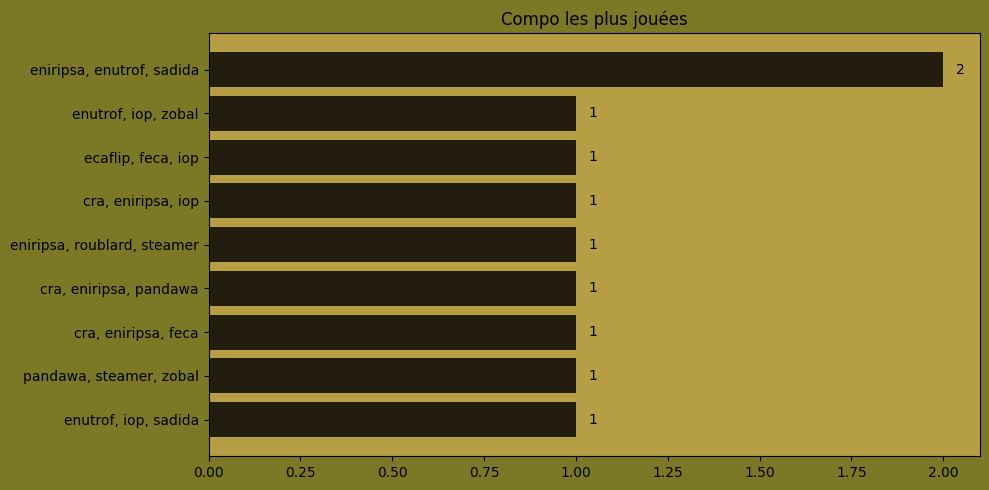

In [17]:
dict_barh(pickrate_compo(team,filter="auto",language=Langue),sort=True,title=TRADUCTIONS["compo"][Langue],savefolder=tournois+"/graphs/")

# pickrate classes

In [18]:
def pickrate_classes(df,language='FR'):
   
   base=dict()
   # list_classes=df["classe_J1"].unique()
   for c in CLASSES:
      base[c]=0

   temp_df=df

   j1=temp_df.groupby(by=["C1"])["equipe"].count().to_dict()
   j2=temp_df.groupby(by=["C2"])["equipe"].count().to_dict()
   j3=temp_df.groupby(by=["C3"])["equipe"].count().to_dict()
   
   pick_c=sum_dict(sum_dict(sum_dict(base,j1),j2),j3)

   trad_dict={TRADUCTIONS[k][language]: v for k, v in pick_c.items()}

   return trad_dict

In [19]:
pickrate_classes(team,language=Langue)

{'xelor': 0,
 'eniripsa': 6,
 'zobal': 2,
 'cra': 3,
 'feca': 2,
 'enutrof': 4,
 'sram': 0,
 'ecaflip': 1,
 'sacrieur': 0,
 'osamodas': 0,
 'iop': 4,
 'sadida': 3,
 'steamer': 2,
 'roublard': 1,
 'pandawa': 2}

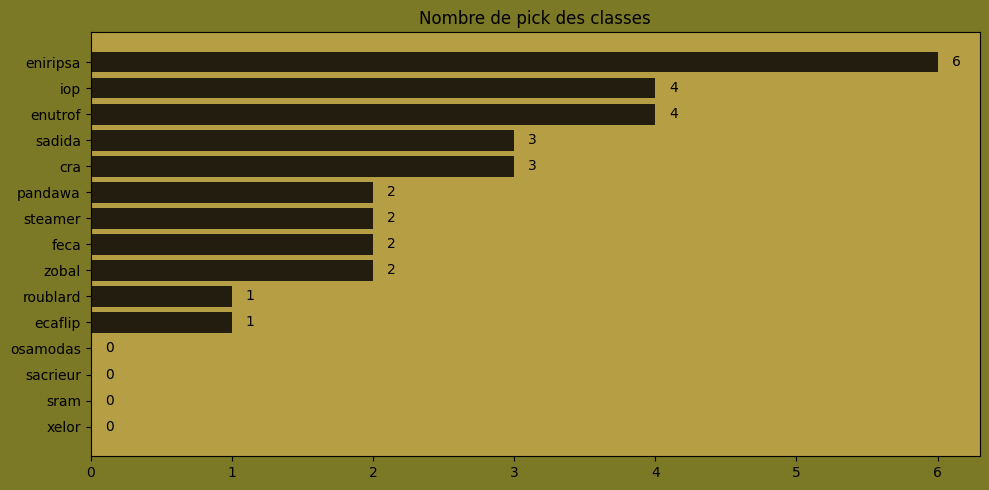

In [20]:
dict_barh(pickrate_classes(team,language=Langue),sort=True,title=TRADUCTIONS["classe"][Langue],savefolder=tournois+"/graphs/")

# pickrate duos

In [21]:
def pickrate_duos(df,filter=-1,language="FR"):
    
    
    temp_df=df.copy()
    # title="duos les plus jouées"

    duo_count=dict()
    
    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[TRADUCTIONS[row["C1"]][language],TRADUCTIONS[row["C2"]][language],TRADUCTIONS[row["C3"]][language]]
        ss.sort()
        if len(ss)==2:
            if str(ss) in duo_count.keys():
                duo_count[str(ss)]+=1
            else:
                duo_count[str(ss)]=1
        elif len(ss)==3:
            sub_list=subsets(ss)
            for sb in sub_list:
                if str(sb) in duo_count.keys():
                    duo_count[str(sb)]+=1
                else:
                    duo_count[str(sb)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(duo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            duo_count=filterTheDict(duo_count, lambda elem : elem[1] > temp_filter)
    elif filter>=0:
        duo_count=filterTheDict(duo_count, lambda elem : elem[1] > filter)

    return duo_count

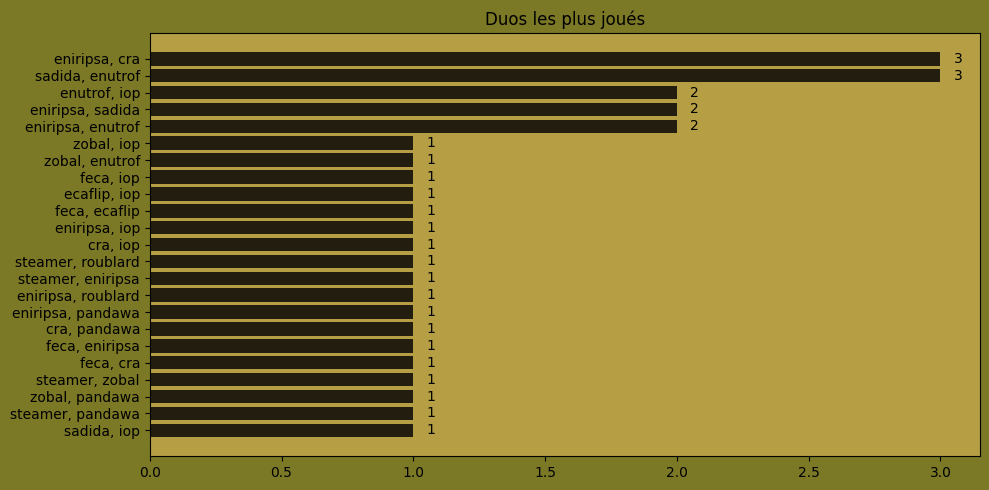

In [22]:
dict_barh(pickrate_duos(team,filter="auto",language=Langue),sort=True,title=TRADUCTIONS["duo"][Langue],savefolder=tournois+"/graphs/")